# Porto Seguro's Safe Driver Prediction

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib as mpl
import seaborn as sns
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

import warnings
from collections import Counter
warnings.filterwarnings('ignore')

train_set = pd.read_csv('C:/Users/Tin Hang/Desktop/WorkingOnPython/Kaggle/DriverPrediction/train.csv')
test_set = pd.read_csv('C:/Users/Tin Hang/Desktop/WorkingOnPython/Kaggle/DriverPrediction/test.csv')

C:\Users\Tin Hang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Analyze Data - Descriptive statistics and visualization
# Data integration, selection, cleaning and pre-processing
# Read train_set and test_set Data
train_set.head() 
train_set.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [4]:
train_set.shape

(595212, 59)

In [5]:
train_set.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [6]:
train_set.dtypes
train_set.shape
train_set.describe() 
train_set.columns
train_set.isnull().sum() # check missing valuestrain_set.describe() 

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [7]:
train_set.isnull().sum() # check missing values

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [8]:
train_set.info(memory_usage='deep',verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Columns: 59 entries, id to ps_calc_20_bin
dtypes: float64(10), int64(49)
memory usage: 267.9 MB


In [9]:
print("Train Missing Data: %d" %train_set.isnull().sum().sum())

Train Missing Data: 0


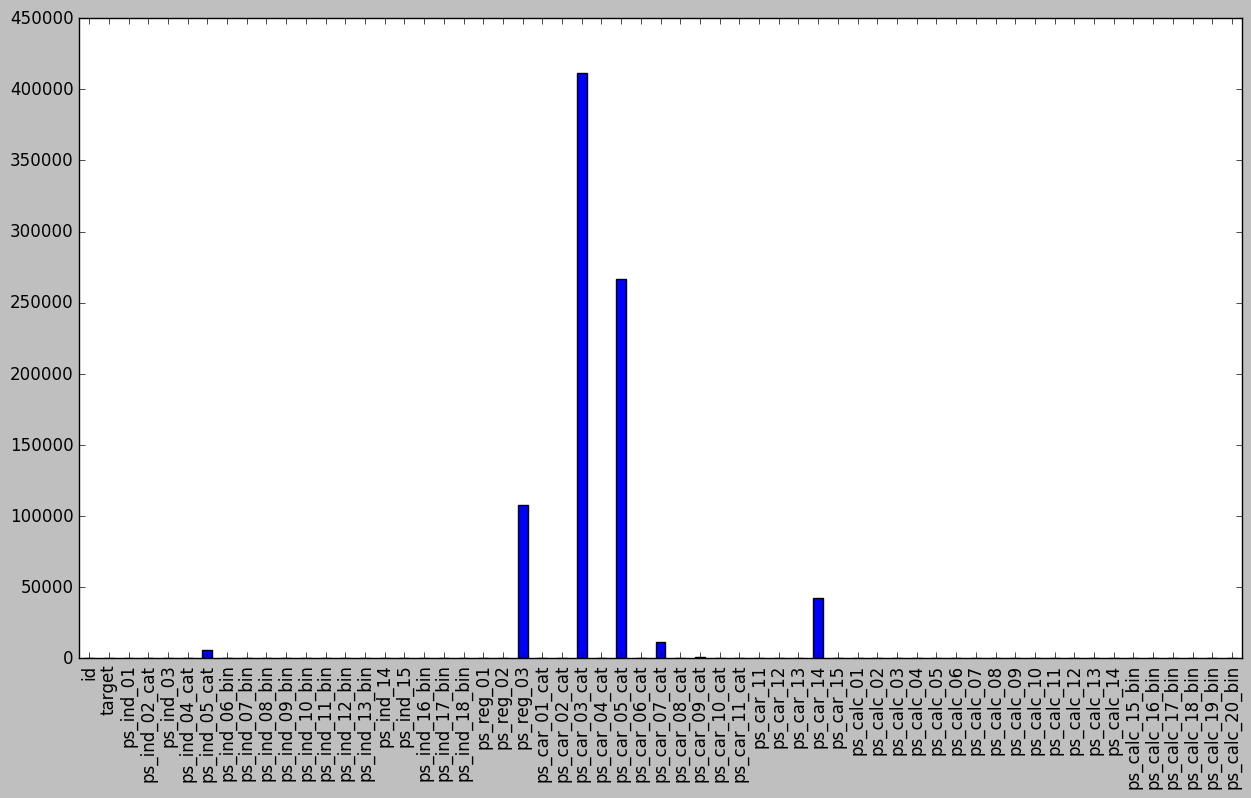

In [10]:
train_missing_count = (train_set == -1).sum() # Values of -1 is missing data
plt.rcParams['figure.figsize'] = (15,8)
train_missing_count.plot.bar()
plt.show()

In [11]:
target = train_set['target'].copy()
train_set = train_set.drop(['id', 'target'], axis=1)

In [12]:
for column in train_set:
    print("{0:15} {1:6d} {2:6}".format(column, train_set[column].nunique(), (train_set[column] == -1).sum()))

ps_ind_01            8      0
ps_ind_02_cat        5    216
ps_ind_03           12      0
ps_ind_04_cat        3     83
ps_ind_05_cat        8   5809
ps_ind_06_bin        2      0
ps_ind_07_bin        2      0
ps_ind_08_bin        2      0
ps_ind_09_bin        2      0
ps_ind_10_bin        2      0
ps_ind_11_bin        2      0
ps_ind_12_bin        2      0
ps_ind_13_bin        2      0
ps_ind_14            5      0
ps_ind_15           14      0
ps_ind_16_bin        2      0
ps_ind_17_bin        2      0
ps_ind_18_bin        2      0
ps_reg_01           10      0
ps_reg_02           19      0
ps_reg_03         5013 107772
ps_car_01_cat       13    107
ps_car_02_cat        3      5
ps_car_03_cat        3 411231
ps_car_04_cat       10      0
ps_car_05_cat        3 266551
ps_car_06_cat       18      0
ps_car_07_cat        3  11489
ps_car_08_cat        2      0
ps_car_09_cat        6    569
ps_car_10_cat        3      0
ps_car_11_cat      104      0
ps_car_11            5      5
ps_car_12 

In [13]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

X = train_set
Y = target
names = train_set.columns
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names),reverse=True))

Features sorted by their score:
[(0.076700000000000004, 'ps_car_13'), (0.061199999999999997, 'ps_reg_03'), (0.040899999999999999, 'ps_car_14'), (0.039899999999999998, 'ps_calc_14'), (0.039600000000000003, 'ps_calc_10'), (0.037400000000000003, 'ps_calc_11'), (0.031399999999999997, 'ps_calc_13'), (0.031, 'ps_calc_02'), (0.031, 'ps_calc_01'), (0.030800000000000001, 'ps_calc_03'), (0.030599999999999999, 'ps_car_11_cat'), (0.030499999999999999, 'ps_ind_15'), (0.029700000000000001, 'ps_calc_07'), (0.029499999999999998, 'ps_reg_02'), (0.029399999999999999, 'ps_ind_03'), (0.028799999999999999, 'ps_calc_08'), (0.026499999999999999, 'ps_calc_06'), (0.0258, 'ps_calc_09'), (0.024500000000000001, 'ps_calc_04'), (0.0241, 'ps_calc_05'), (0.023300000000000001, 'ps_car_15'), (0.023, 'ps_calc_12'), (0.022200000000000001, 'ps_reg_01'), (0.022200000000000001, 'ps_ind_01'), (0.021899999999999999, 'ps_car_06_cat'), (0.0212, 'ps_car_01_cat'), (0.020400000000000001, 'ps_car_12'), (0.011900000000000001, 'ps_ca

In [14]:
# Drop Columns that has -1 because the feature has missing from observations
for columns in train_set:
    if '-1' in columns:
        del train_set[columns]

In [15]:
# Train_set.drop(columns for columns in Train_set.columns if "-1" in columns], axis=1, inplace=True)
for col_names in train_set:
    if 'ps_calc' in col_names:
        del train_set[col_names]                

In [16]:
# Count the numbers of int64, float64, bool or object/string features
int_features = train_set.select_dtypes(include = ['int64']).columns.values
float_features = train_set.select_dtypes(include = ['float64']).columns.values
bool_features= train_set.select_dtypes(include = ['bool']).columns.values
categorical_features = train_set.select_dtypes(include = ['object']).columns.values
print('int_features:', int_features)
print('float_features:', float_features)
print('bool_features:', bool_features)
print('categorical_features:', categorical_features)

int_features: ['ps_ind_01' 'ps_ind_02_cat' 'ps_ind_03' 'ps_ind_04_cat' 'ps_ind_05_cat'
 'ps_ind_06_bin' 'ps_ind_07_bin' 'ps_ind_08_bin' 'ps_ind_09_bin'
 'ps_ind_10_bin' 'ps_ind_11_bin' 'ps_ind_12_bin' 'ps_ind_13_bin'
 'ps_ind_14' 'ps_ind_15' 'ps_ind_16_bin' 'ps_ind_17_bin' 'ps_ind_18_bin'
 'ps_car_01_cat' 'ps_car_02_cat' 'ps_car_03_cat' 'ps_car_04_cat'
 'ps_car_05_cat' 'ps_car_06_cat' 'ps_car_07_cat' 'ps_car_08_cat'
 'ps_car_09_cat' 'ps_car_10_cat' 'ps_car_11_cat' 'ps_car_11']
float_features: ['ps_reg_01' 'ps_reg_02' 'ps_reg_03' 'ps_car_12' 'ps_car_13' 'ps_car_14'
 'ps_car_15']
bool_features: []
categorical_features: []


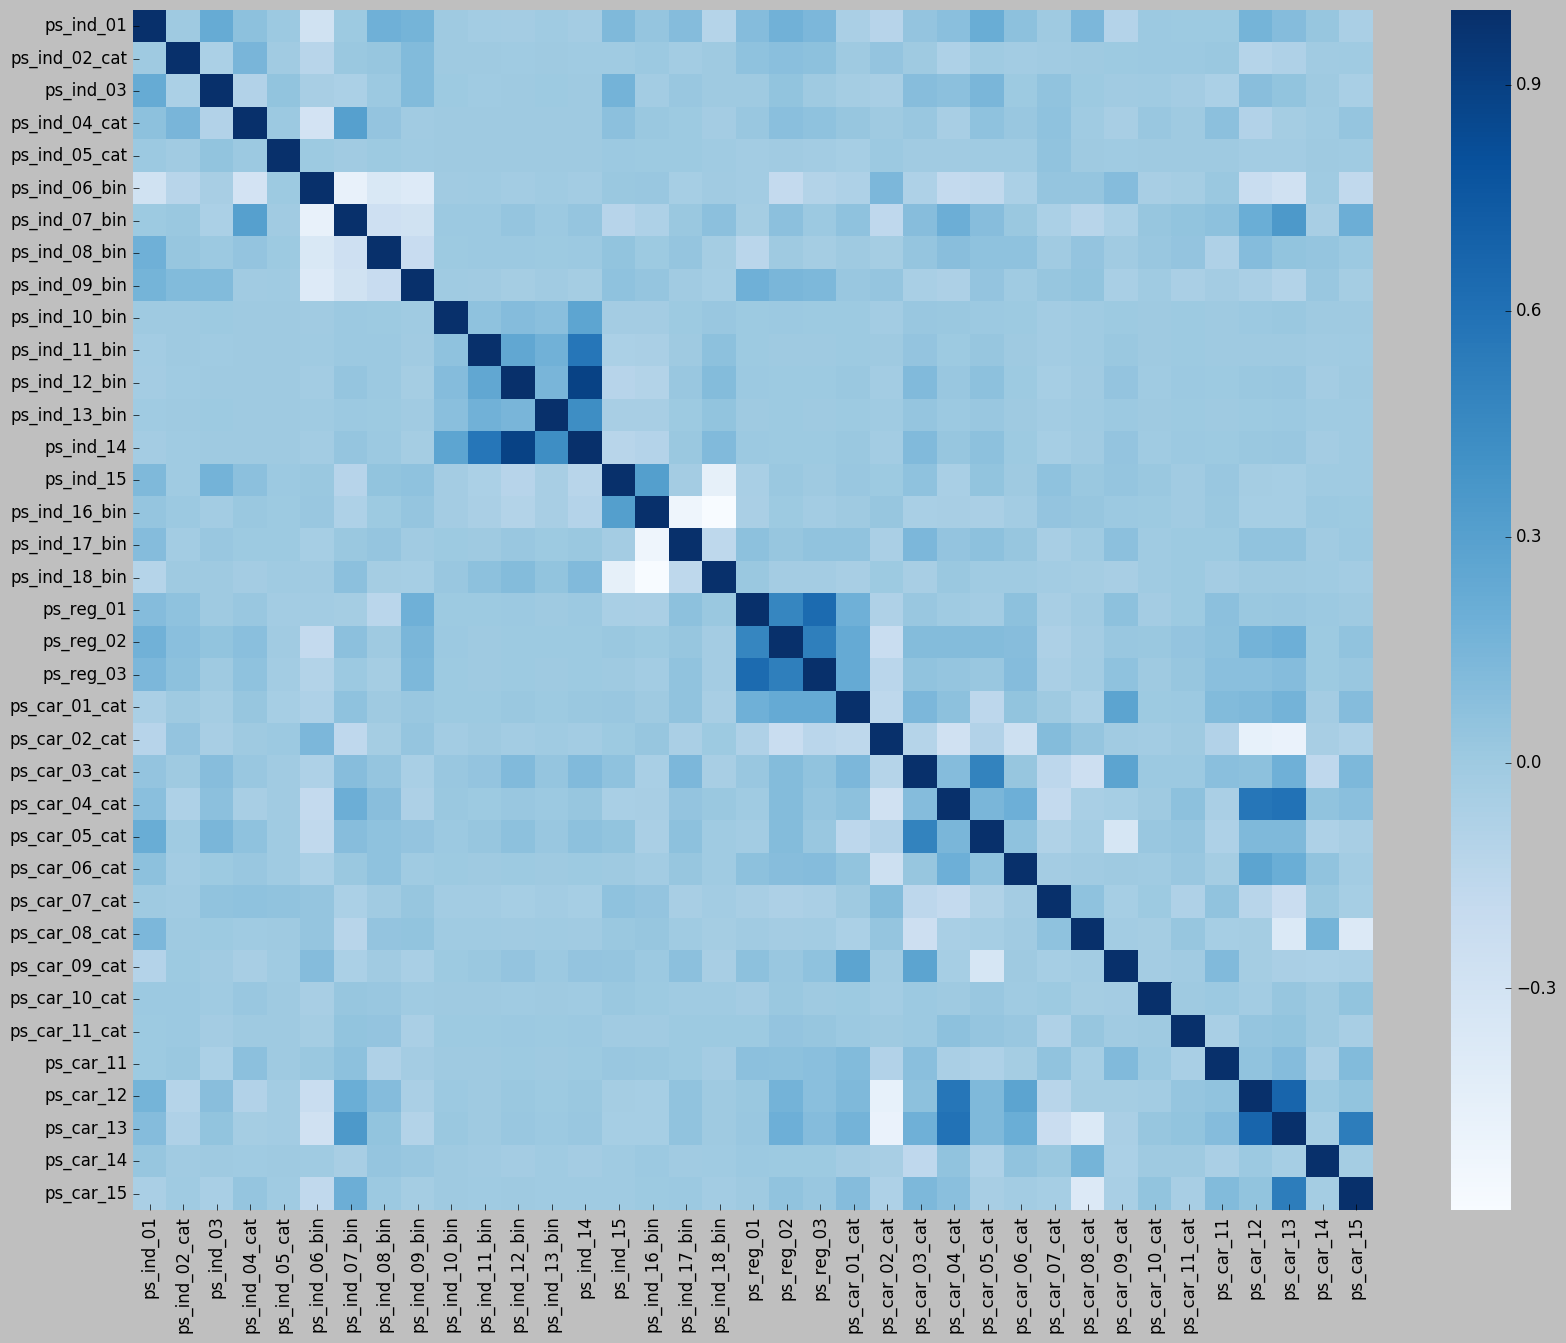

In [17]:
import seaborn as sns
#sns.set_style('White')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(20,15))
sns.heatmap(train_set.corr(), cmap='Blues')
plt.show()

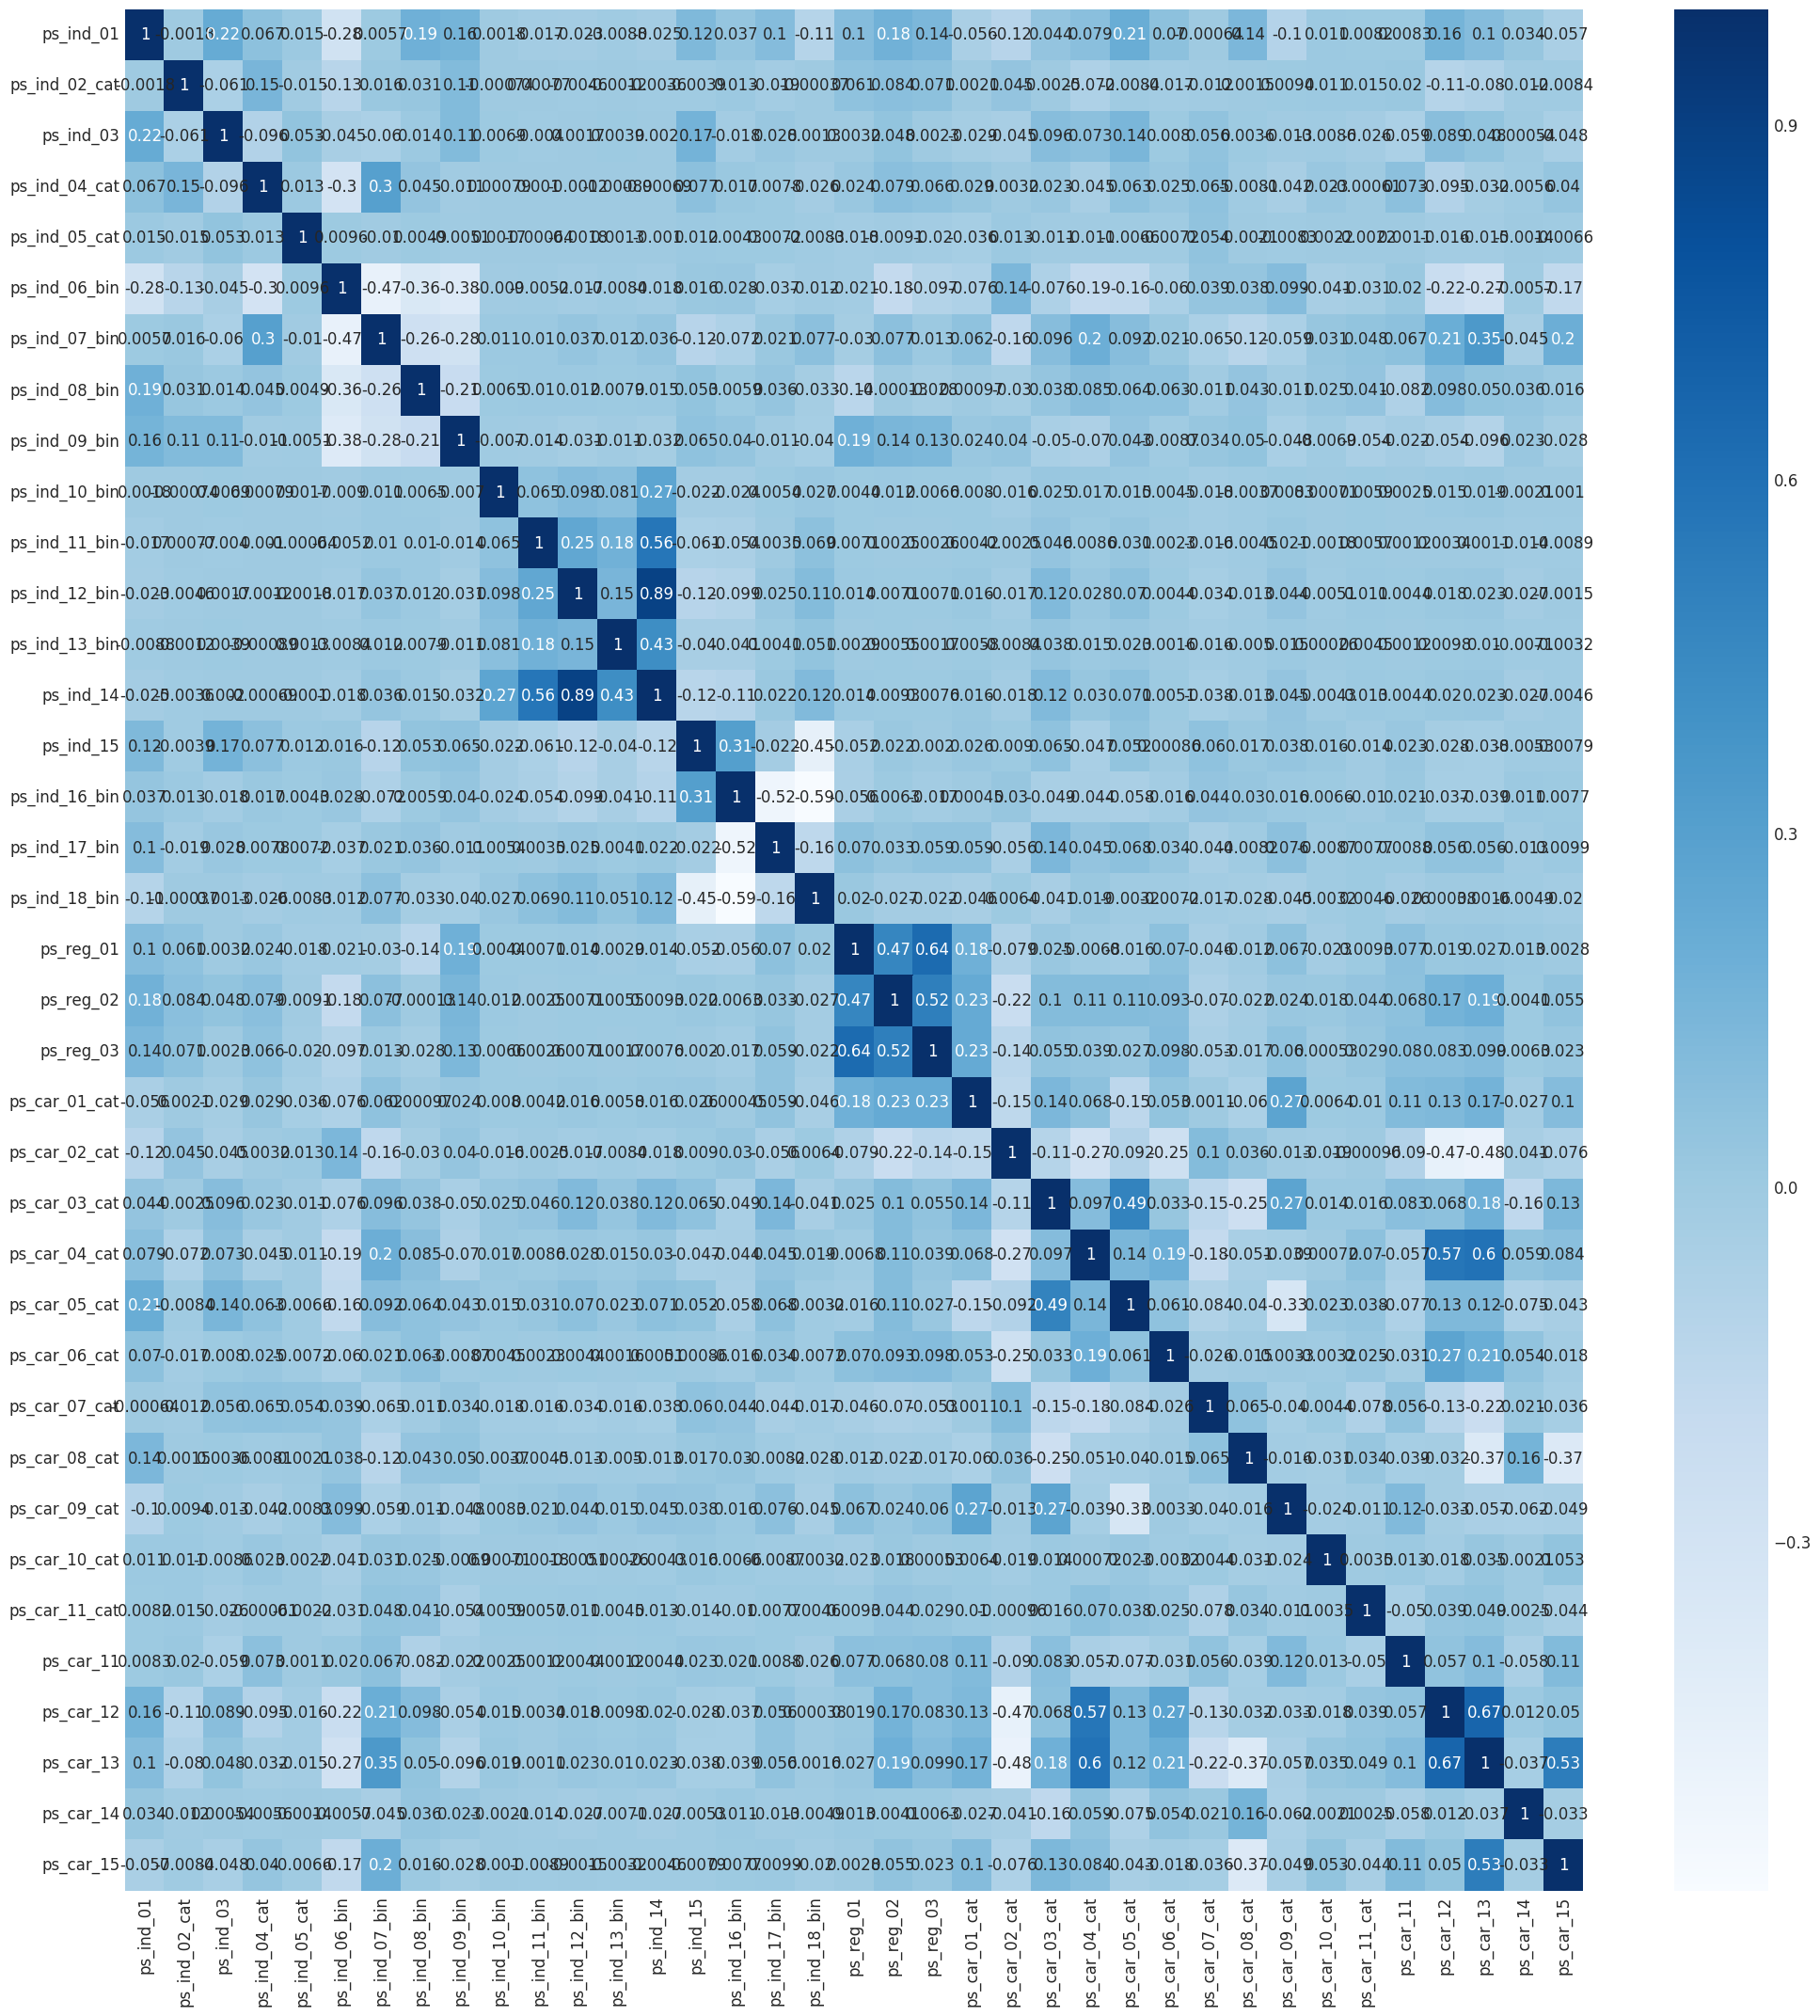

In [59]:
sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(25, 25))
sns.heatmap(train_set.iloc[:train_set.shape[0]].corr(), annot = True, cmap = 'Blues')
plt.show()

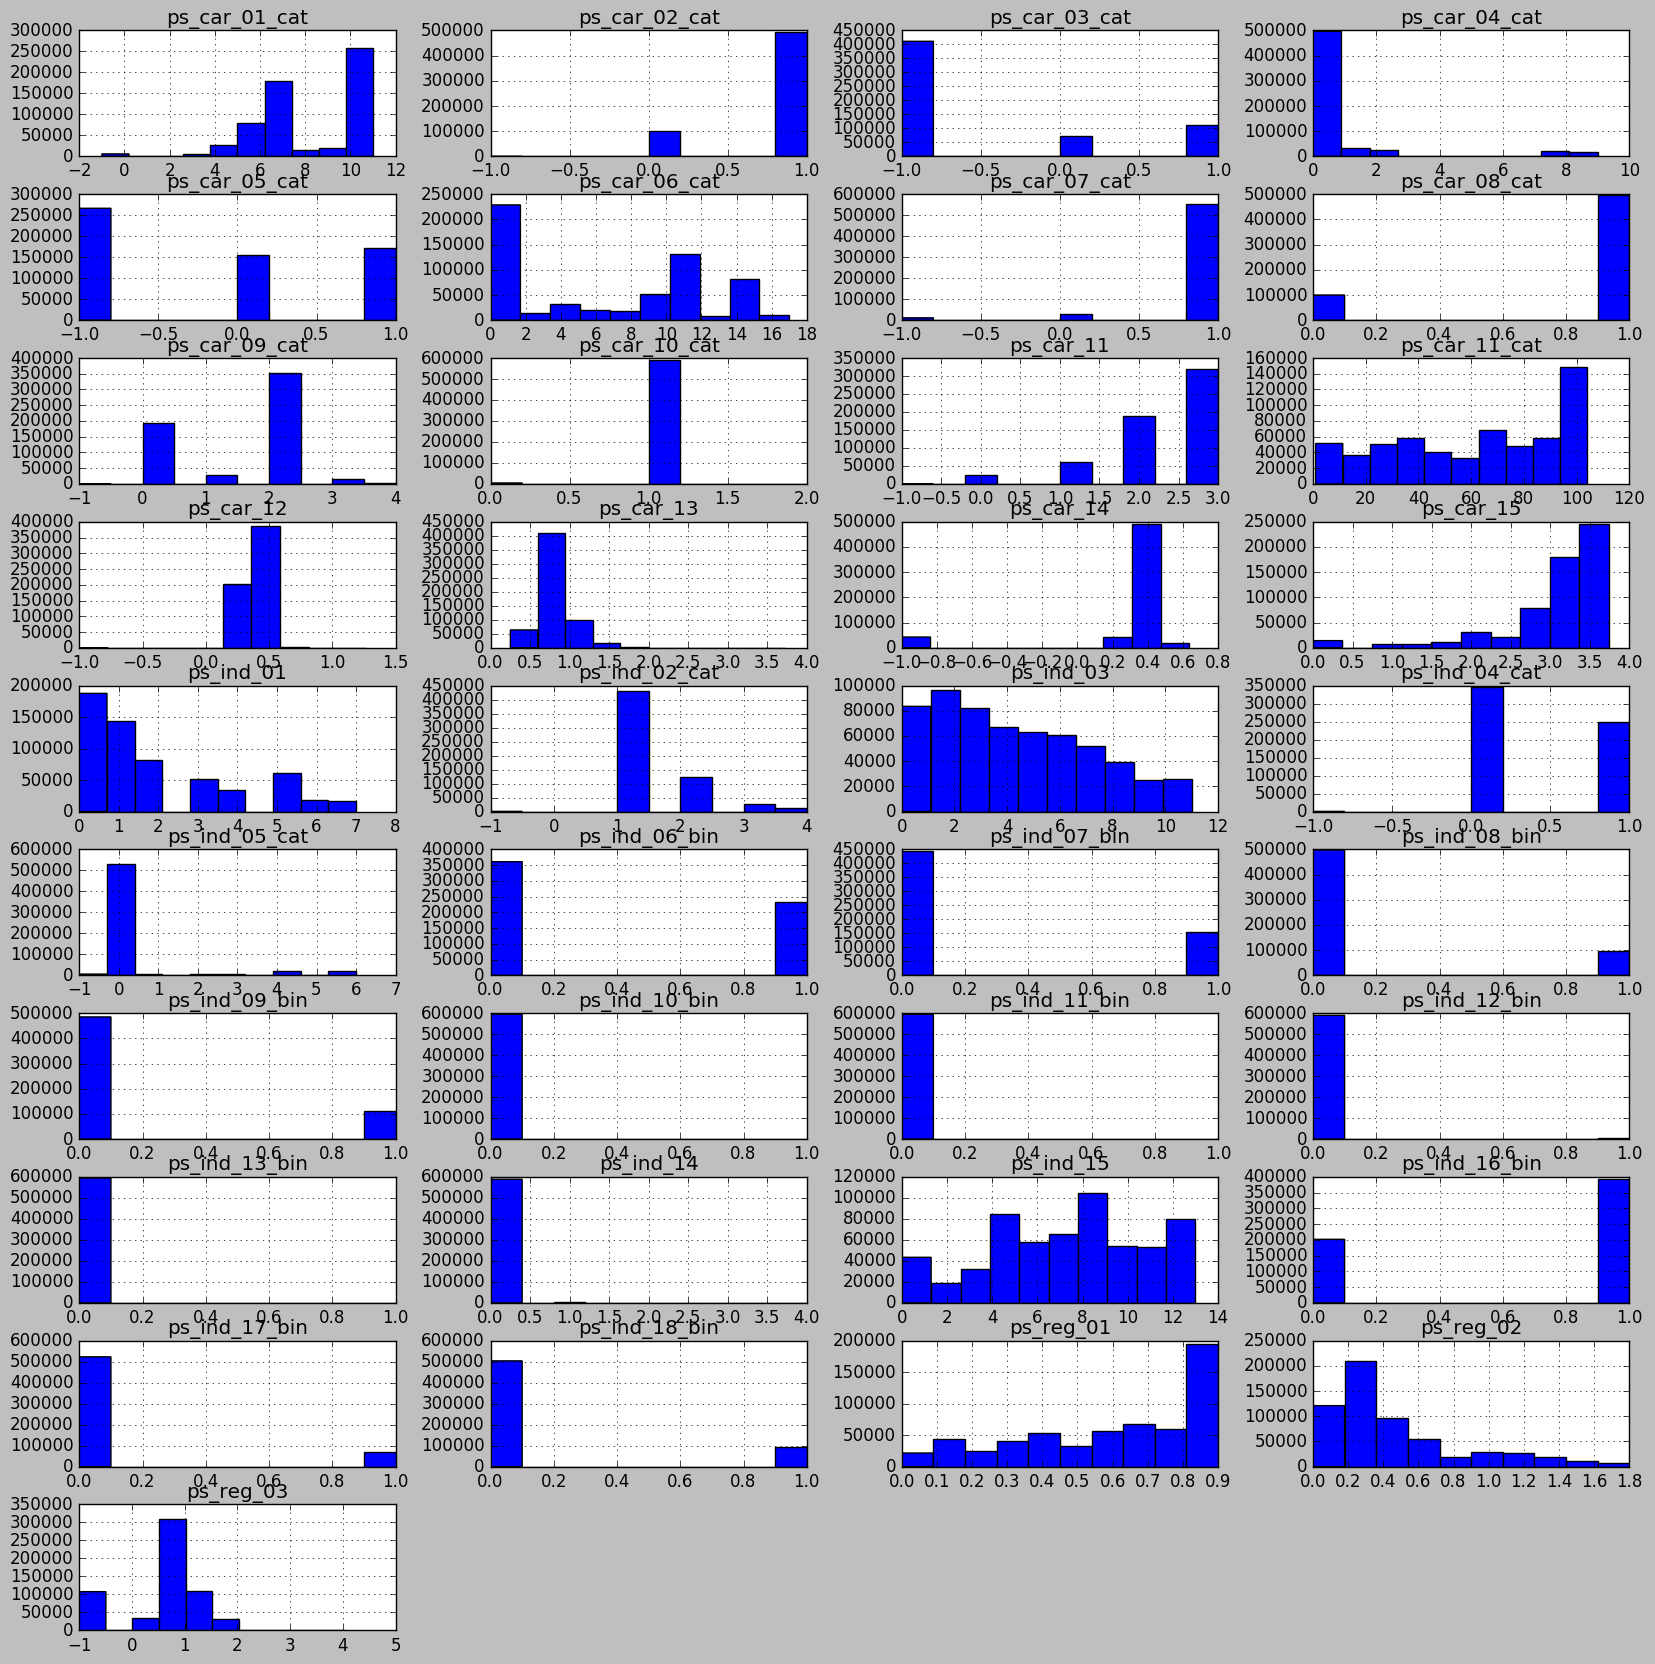

In [18]:
columns_multi = [x for x in list(train_set.columns)]
columns_multi
plt.rcParams['figure.figsize'] = (20,20)
names = columns_multi
train_set.hist(layout = (10,4), column = columns_multi)
plt.show()

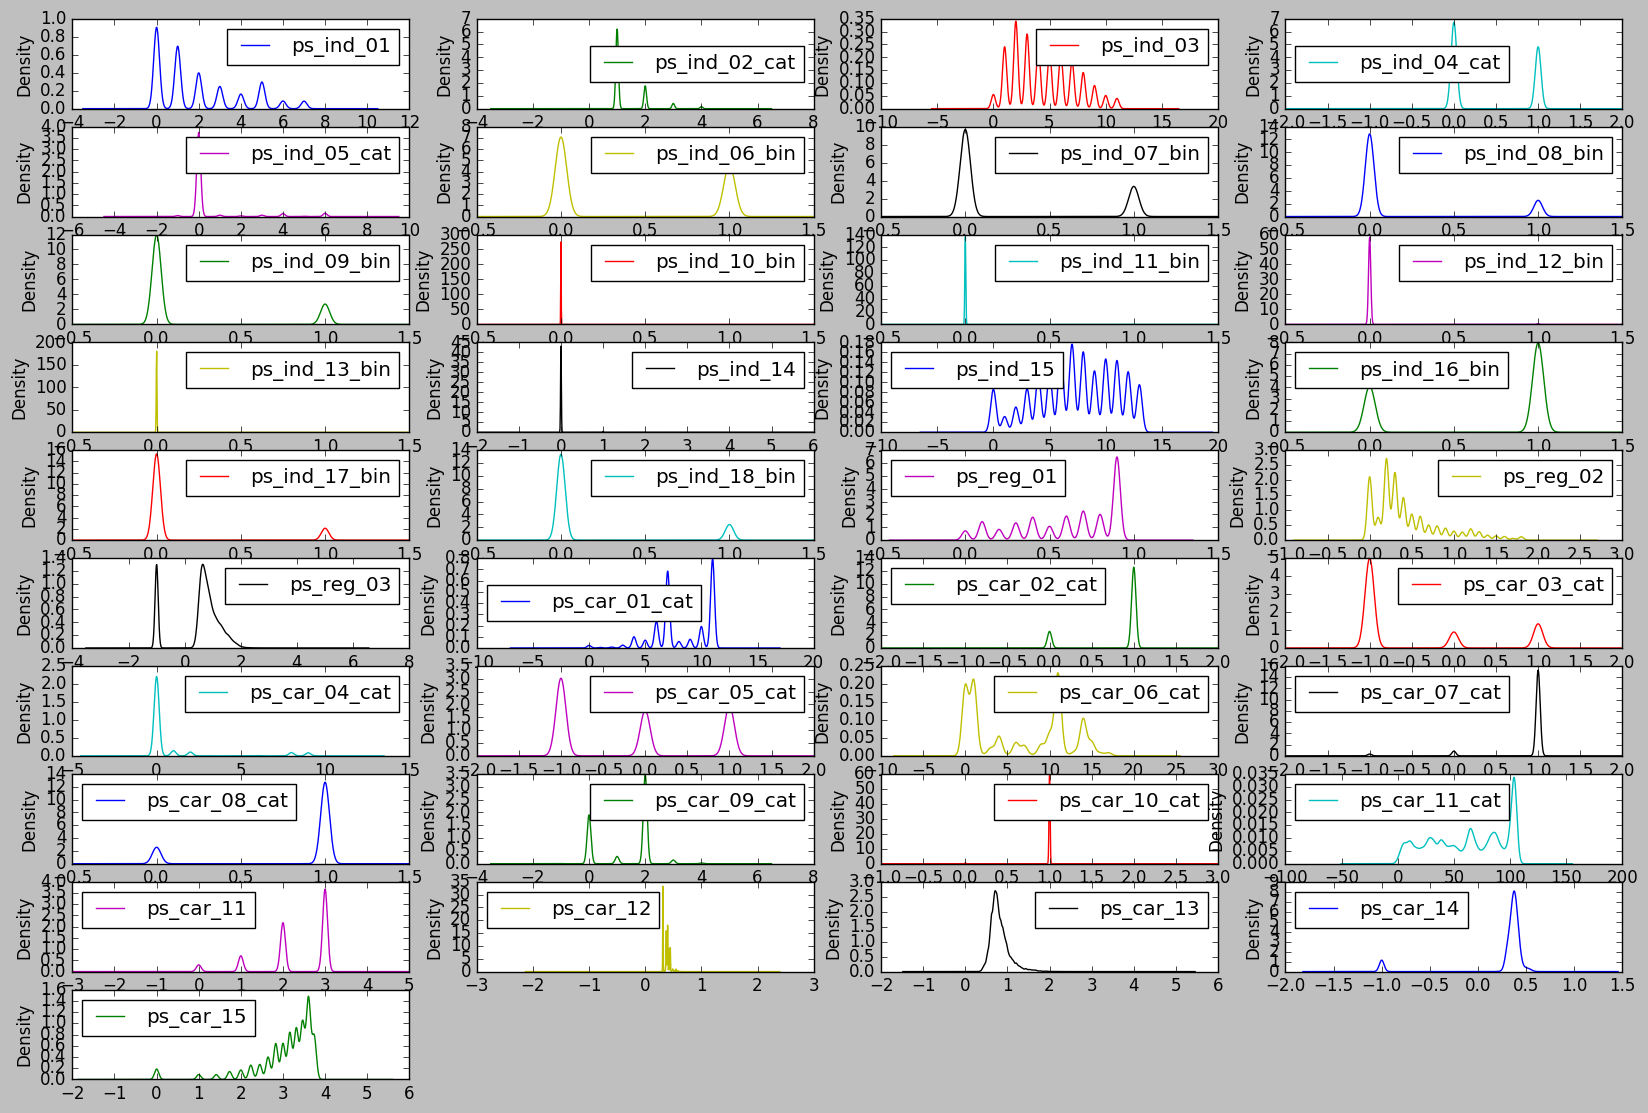

In [19]:
names = columns_multi
train_set.plot(kind='density', subplots=True, layout=(15,4), sharex=False)
plt.show()

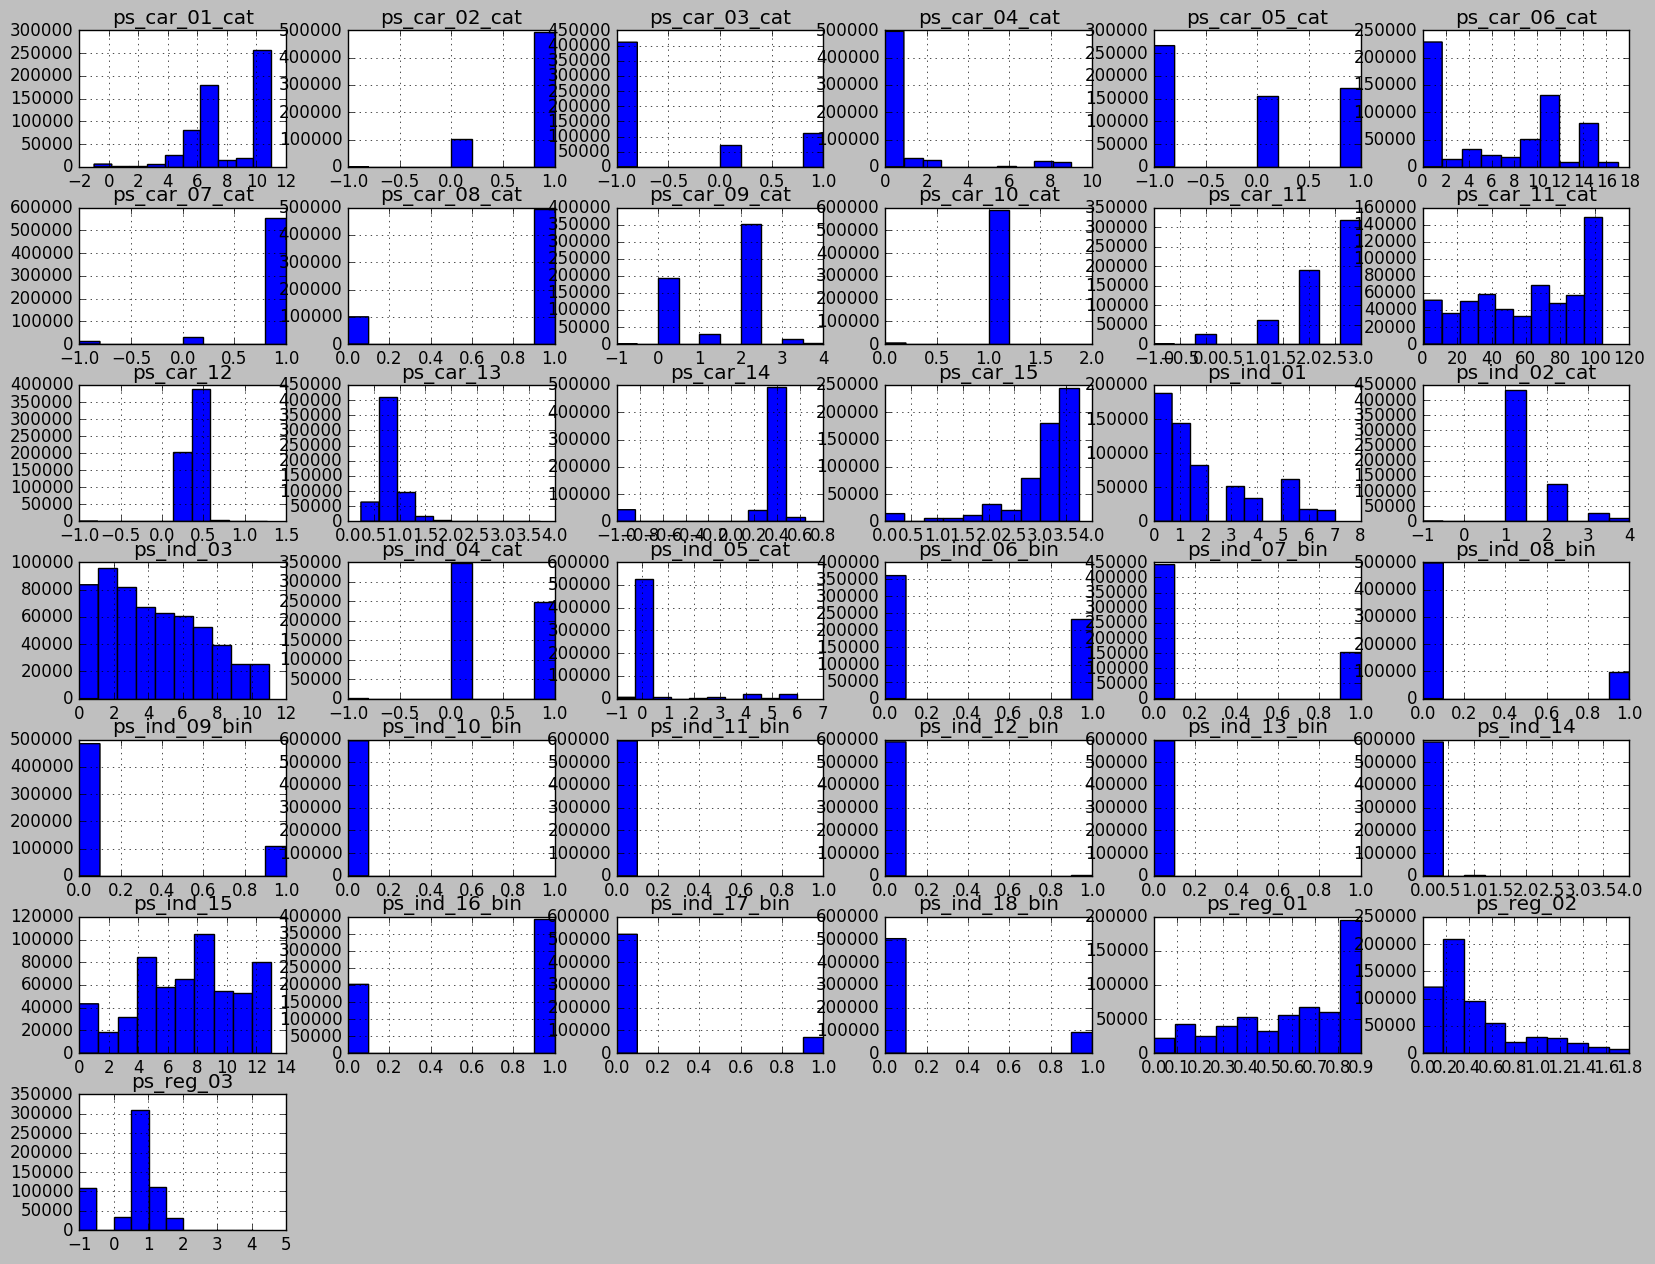

In [35]:
train_set.hist()
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

In [85]:
str_cat = train_set.filter(like='_cat')
str_cat

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,2,1,0,10,1,-1,0,1,4,1,0,0,1,12
1,1,0,0,11,1,-1,0,-1,11,1,1,2,1,19
2,4,1,0,7,1,-1,0,-1,14,1,1,2,1,60
3,1,0,0,7,1,0,0,1,11,1,1,3,1,104
4,2,1,0,11,1,-1,0,-1,14,1,1,2,1,82
5,1,0,0,10,0,-1,0,0,14,1,1,0,1,104
6,1,1,0,6,1,-1,0,1,11,1,1,0,1,99
7,1,0,0,11,1,0,0,0,11,1,1,2,1,30
8,1,1,0,10,1,-1,0,1,14,1,1,0,1,68
9,1,0,0,11,0,0,1,0,14,1,1,2,1,104


In [94]:
s = train_set.columns
str_cat = s.str.contains("_cat")
str_cat

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False, False], dtype=bool)